In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 简单的数据清洗

In [63]:
train = pd.read_csv('/home/jakey/文档/kaggle/House_price/train.csv')
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [64]:
test = pd.read_csv('/home/jakey/文档/kaggle/House_price/test.csv')
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
all_features = pd.concat([train.loc[:,'MSSubClass':'SalePrice'],test.loc[:,'MSSubClass':'SaleCondition']], ignore_index=True, sort = False)

In [89]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index

#### 数值特征缩放

In [90]:
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x-x.mean())/(x.std()))

#### 对非数值特征进行onehot编码

In [91]:
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features = all_features.fillna(all_features.mean())

#### 进行模型训练

In [125]:
from sklearn.linear_model import LinearRegression
X = all_features.iloc[:train.shape[0], :-1].values
Y = train.iloc[:,-1].values
X_test = all_features.iloc[train.shape[0]:, :-1].values

In [100]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
pre = regression.predict(x_test)

In [106]:
test['SalePrice'] = pre

In [107]:
submission = pd.concat([test['Id'], test['SalePrice']], axis=1)

In [108]:
submission.to_csv('/home/jakey/文档/kaggle/House_price/result/submission3.csv', index=False)

###  result: 评分不理想，考虑数据分析和清洗的重要性，以及换用稍复杂的线性模型

### 细化数据的分析和处理

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
def ignore_warning(*args, **kswags):
    pass


In [4]:
train = pd.read_csv('/home/jakey/文档/kaggle/House_price/train.csv')
test = pd.read_csv('/home/jakey/文档/kaggle/House_price/test.csv')

In [8]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1,inplace=True)

### 数据处理

#### 离群值

Text(0,0.5,'SalePrice')

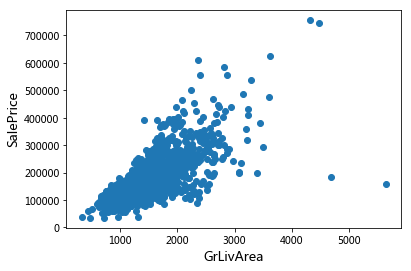

In [16]:
#房子的平方和房价的关系
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

#### 删除右下角的偏离值

In [21]:
train = train.loc[(train['GrLivArea'] < 4000) | 
             (train['SalePrice'] > 300000)]

### 目标变量

目标变量是需要预测的值，所以对它进行分析


 mu = 180932.92 and sigma = 79467.79



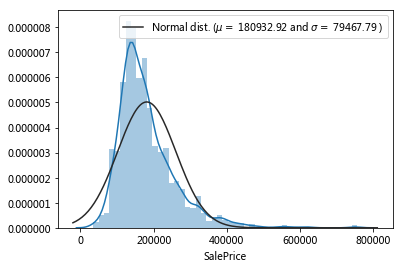

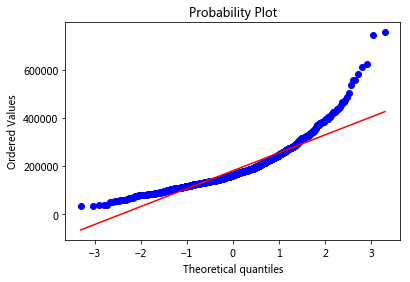

In [38]:
#纵坐标为概率密度
#kde为核密度:仅靠数据本身进行最大程度的拟合
#拟合标准正态分布
#如果没有fit=norm参数，则不会显示途中的灰色曲线（正太分布曲线，用于对比）
sns.distplot(train['SalePrice'],fit=norm)
mu, sigma = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

线性回归对正太分布的数据效果更好，但从目标数据的拟合上来看，其与正态分布有一些差距，有着明显的倾斜